In [56]:
import torch.nn as nn
import torch
from retail import retail
import torch.distributions as d
import torch.nn.functional as F
import numpy as np
import seaborn as sns


In [92]:
# We generate a store with 1000 items
store_args= {'assortment_size': 1000, 'bucket_cov': torch.eye(4)/100, 'seed':1515,
             'max_stock': 1000, 'forecastVariance' :0., 'horizon': 100, 'lead_time': 1}

store = env_rlpyt.StoreEnv(**store_args)

cheap_carrier = {'transport_size': 2000000, 'transport_cost': 250.}
expensive_carrier = {'transport_size': 3000000, 'transport_cost': 500.}


In [93]:
# We generate an order to the warehouse for all items - between 0 and 100 of each.
torch.manual_seed(42)
order = (torch.rand(1000)*100).round()

In [94]:
#Compute the items contribution to cost

fast_cost = store.transportation_cost(order, **fast_truck_args)

slow_cost = store.transportation_cost(order, **slow_truck_args)



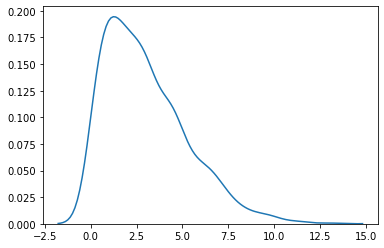

In [95]:
# We can now see, by item, the difference in cost created by the use of fast trucks.

x = fast_cost - slow_cost
sns.kdeplot(x.numpy())

In [97]:
np.savetxt("transportation.csv", x, delimiter=",")
